In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df_student = pd.read_csv('StudentsPerformance.csv')
df_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df_student['total_score'] = (df_student['math score'] + df_student['reading score'] + df_student['writing score'])

In [4]:
df_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [5]:
df_student['total_average_score'] = df_student['total_score']/3
df_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,total_average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [6]:
def result(total_average):
    if total_average >=55:
        return "PASS"
    else:
        return "FAIL"

In [7]:
df_student['result'] = df_student['total_average_score'].apply(result)

In [8]:
df_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,total_average_score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,PASS
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,PASS
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,PASS
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,FAIL
4,male,group C,some college,standard,none,76,78,75,229,76.333333,PASS


In [9]:
df_summary = df_student[['parental level of education', 'total_average_score', 'result']]

In [10]:
df_summary

,parental level of education,total_average_score,result
0,bachelor's degree,72.666667,PASS
1,some college,82.333333,PASS
2,master's degree,92.666667,PASS
3,associate's degree,49.333333,FAIL
4,some college,76.333333,PASS
...,...,...,...
995,master's degree,94.000000,PASS
996,high school,57.333333,PASS
997,high school,65.000000,PASS
998,some college,74.333333,PASS


In [11]:
df_pass_fail = df_summary.groupby(['parental level of education', 'result']).count()
df_pass_fail

total_average_score
parental level of education result                     
associate's degree          FAIL                     38
                            PASS                    184
bachelor's degree           FAIL                     12
                            PASS                    106
high school                 FAIL                     57
                            PASS                    139
master's degree             FAIL                      7
                            PASS                     52
some college                FAIL                     33
                            PASS                    193
some high school            FAIL                     44
                            PASS                    135

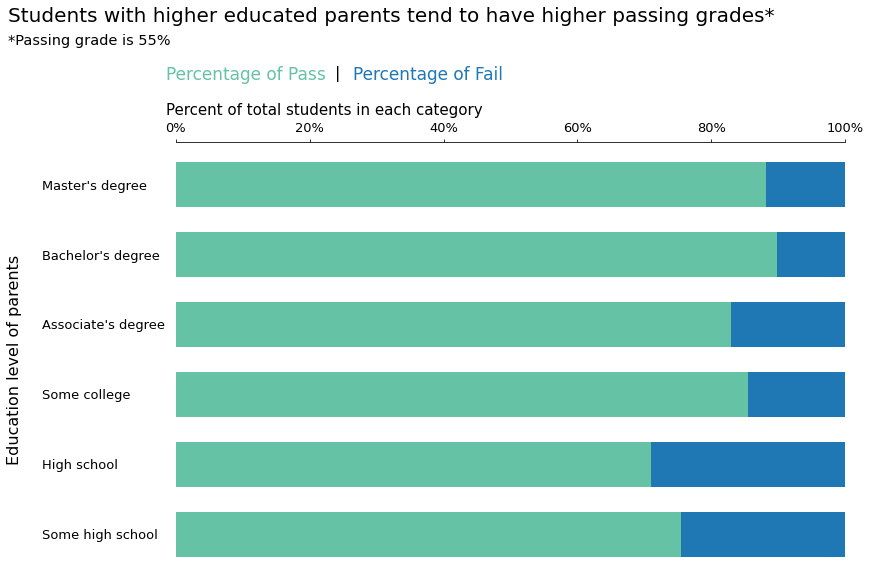

In [79]:
fig, ax = plt.subplots(figsize=(12,8))

ax.barh(np.arange(6), 1,  height=0.65, color='#1f78b4')
i = '#66c2a5'
ax.barh(5, 52/59, height=0.65, color=i)
ax.barh(4, 106/118, height=0.65, color=i)
ax.barh(3, 184/222, height=0.65, color=i)
ax.barh(2, 193/226, height=0.65, color=i)
ax.barh(1, 139/196, height=0.65, color=i)
ax.barh(0, 135/179, height=0.65, color=i)

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.set_yticklabels([None, 'Some high school', 'High school', 'Some college', '''Associate's degree''', '''Bachelor's degree''', '''Master's degree'''], ha = 'left',fontsize=13)
ax.set_xticklabels(['0%','20%','40%','60%','80%','100%'], fontsize=13)
ax.tick_params(axis='y', pad=130)
ax.set_xlim(0,1)

ax.text(-.25,7.32,"Students with higher educated parents tend to have higher passing grades*", fontsize=20)
ax.text(-.25,7,"*Passing grade is 55%", fontsize=14.5)
ax.text(0-.015,6.5,"Percentage of Pass", color="#66c2a5", fontsize=17)
ax.text(0.25-.012,6.52,"|", fontsize=16)
ax.text(0.28-.015,6.5,"Percentage of Fail", fontsize=17, color="#1f78b4")
ax.text(0-.015,6,"Percent of total students in each category", fontsize=15)
ax.set_ylabel('Education level of parents',fontsize=16, labelpad=20)

plt.tick_params(labeltop=True,labelleft=True,labelright=False,labelbottom=False)
plt.tick_params(top=True,bottom=False,left=False,right=False)

plt.show()